Reto 2 - Árboles de Decisión
Juan José Martínez Valencia
Una fintech busca el desarrollo de un modelo de arbol de decisión que permita predecir qué jugadores es probable que hagan compras dentro de la aplicación.

Las variables a utilizar serán:
- Age (Entrada): Edad del jugador pues puede influir por los patrones de comportamiento asociados a la edad
- Income(Entrada) : Ingresos del jugador pues da el poder adquisitivo del jugador
- Years(Entrada) : Número de años que ha utilizado el juego dando una mayor probabilidad de compra
- Hours(Entrada) :Número promedio de horas que pasa el jugador en el juego

- Buy (Salida) :Define si es probable que el jugador compre o no

Cargar las librerías de referencia para el modelo

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt #Graficador
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier #Modelo

#Para no tener que cargar el archivo
from google.colab import files
from google.colab import drive # Import the drive module
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Se procede con la carga de los datos del archivo 2.BD2_In_App_Pur

In [ ]:
nxl='/content/drive/MyDrive/Colab Notebooks/2. BD2_In_App_Pur_Int.xlsx'
XDB=pd.read_excel(nxl,sheet_name=1)
XDB=XDB.dropna()  #Eliminar celdas vacías
XDB.head(100)


[[ 21 128   3  22]
 [ 50 128   1   6]]
[[0 1]
 [0 0]]


Agrego datos de entrenamiento

In [ ]:
df = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/2. BD2_In_App_Pur_Int.xlsx")

# Mostrar las primeras filas
print("Datos de entrenamiento:")
print(df.head())


Datos de entrenamiento:
   Age  Sex  Income  Years  Hours  CreditCard  Facebook  Buy
0   40    0     139      3     25           1         1    0
1   26    0     138      7      4           1         1    0
2   48    0     138      7      8           1         1    0
3   60    0     138      6     29           0         1    0
4   21    0     137      5     21           0         1    0


Separo las variables de entrada y la objetivo

In [ ]:
X = df[['Age', 'Income', 'Years', 'Hours']]  # Variables de entrada
y = df['Buy']  # Variable objetivo (1 = compra, 0 = no compra)

Entreno el arbol de decisión

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    precision_score,
    recall_score,
)

#  Entrenar el modelo (puedes ajustar max_depth, criterio, etc.)
modelo = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=42)
modelo.fit(X, y)

#  Predecir sobre el mismo conjunto (o mejor: usar test separado)
y_pred = modelo.predict(X)

#  Matriz de confusión
cm = confusion_matrix(y, y_pred)
TN, FP, FN, TP = cm.ravel()

# Cálculo manual de las métricas
exactitud = (TN + TP) / (TN + TP + FN + FP)
sensibilidad = TP / (TP + FN)
especificidad = TN / (TN + FP)
precision = TP / (TP + FP)

print("=== Métricas manuales ===")
print(f"La Exactitud por el modelo es : {exactitud:.4f}")
print(f"La Sensibilidad por el modelo es : {sensibilidad:.4f}")  # Recall clase positiva
print(f"La Especificidad por el modelo es : {especificidad:.4f}")  # Recall clase negativa
print(f"La Precisión por el modelo es : {precision:.4f}")

# Informe completo de clasificación
print("\n=== Classification Report ===")
print(classification_report(y, y_pred, digits=4))

=== Métricas manuales ===
La Exactitud por el modelo es : 0.8475
La Sensibilidad por el modelo es : 0.9479
La Especificidad por el modelo es : 0.7354
La Precisión por el modelo es : 0.8000

=== Classification Report ===
              precision    recall  f1-score   support

           0     0.9267    0.7354    0.8201       189
           1     0.8000    0.9479    0.8677       211

    accuracy                         0.8475       400
   macro avg     0.8633    0.8417    0.8439       400
weighted avg     0.8599    0.8475    0.8452       400



Caso de los jugadores

In [ ]:
# Predecir para nuevos casos

df_score = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/2. BD2_In_App_Pur_Int.xlsx')
print("\nNuevos casos:")
print(df_score.head())

# Probabilidades de compra
probabilidades = modelo.predict_proba(df_score[['Age', 'Income', 'Years', 'Hours']])
print("\nProbabilidad de compra para el primer jugador:", probabilidades[0][1])
print("Probabilidad de compra para el segundo jugador:", probabilidades[1][1])


predicciones = modelo.predict(df_score[['Age', 'Income', 'Years', 'Hours']])
print("\nRegla de negocio (clasificación) para el primer jugador:", predicciones[0])
print("Regla de negocio (clasificación) para el segundo jugador:", predicciones[1])


Nuevos casos:
   Age  Sex  Income  Years  Hours  CreditCard  Facebook  Buy
0   40    0     139      3     25           1         1    0
1   26    0     138      7      4           1         1    0
2   48    0     138      7      8           1         1    0
3   60    0     138      6     29           0         1    0
4   21    0     137      5     21           0         1    0

Probabilidad de compra para el primer jugador: 0.6695652173913044
Probabilidad de compra para el segundo jugador: 0.25

Regla de negocio (clasificación) para el primer jugador: 1
Regla de negocio (clasificación) para el segundo jugador: 0


 Porcentaje de uso de tarjeta según regla específica

In [ ]:
subset = df[(df['Income'] > 63.5) & (df['Income'] <= 137.5) & (df['Years'] > 5.5)]
pct_tarjeta = subset['CreditCard'].mean() * 100
print(f"% en el subconjunto que usan tarjeta: {pct_tarjeta:.4f}%")

% en el subconjunto que usan tarjeta: 55.3030%


Visualización del árbol (solo ramal izquierdo a 3 niveles)

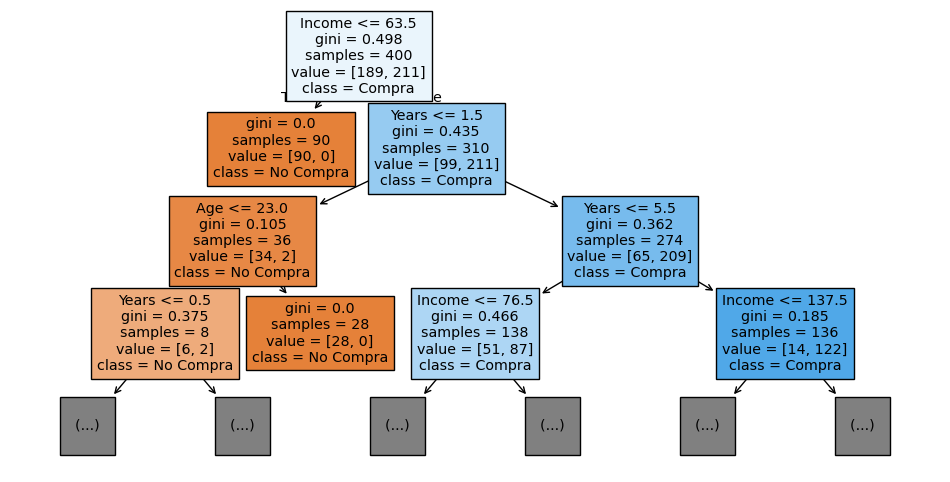

In [ ]:
from sklearn.tree import plot_tree # Import plot_tree

plt.figure(figsize=(12, 6))
plot_tree(modelo, feature_names=['Age', 'Income', 'Years', 'Hours'], class_names=['No Compra', 'Compra'], filled=True, max_depth=3)
plt.show()

## **Análisis de Resultados**

De acuerdo con los resultados obtenidos por el modelo, podemos observar de manera general que el modelo logró una exactitud que se ubicó por encima del 75% en promedio (0,8475), lo que indica el buen comportamiento general del modelo frente en la clasificación, indicando una grán precisión al predecir la compra de los productos.

Este valor está por encima al 75% que es un indicador positivo del rendimiento que tiene el modelo para tomar decisiones en loq ue a compra se refiere. Además se puede ver que la sensibilidad fue de 0.9479 y la especificidad de 0.7354. Significando que es bueno para identificar a los clientes que realmente compran (calificación positiva) , pero en comparación vemos que aunque la especificidad se acerca al 75% (0.7354) que es un rango aceptable, sugiere que hay cierta tendencia a clasificar incorrectamente a los clientes que no compran (falsos positivos)

El árbol de decisiones muestra que las variables más relevantes para tomar decisiones son el "income" y "Years". Especificamente un "income" inferior a 63.5 o "Years" superior a 1.5 favorecen una clasificación de compra. Tambien muestra que los casos con una clasificación en el nodo de compra predominan cuando los valores de "Income" y "Years" están dentro de los umbrales más bajos o más altos.

Por último, se destacan estas reglas del negocio:
En el caso del primer jugador, el modelo predice que tiene una probabilidad de compra de 67% (0.6696), clasificandolo con la regla de negocio como un "Comprará"

En el segundo se ve una probabilidad de 25% (0.25) dandose un "No comprará"
Con esta clasificación se puede ver que el 55% (0,5503) de los clientes que compran usarán tarjeta de crédito